Lambda School Data Science

*Unit 2, Sprint 1, Module 3*

---

In [1]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

# Module Project: Ridge Regression

For this project, you'll return to the Tribecca Condo dataset. But this time, you'll look at the _entire_ dataset and try to predict property sale prices.

The [NYC Department of Finance](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page) has a glossary of property sales terms and NYC Building Class Code Descriptions. The data comes from the [NYC OpenData](https://data.cityofnewyork.us/browse?q=NYC%20calendar%20sales) portal.

## Directions

The tasks for this project are the following:

- **Task 1:** Import `csv` file using `wrangle` function.
- **Task 2:** Conduct exploratory data analysis (EDA), and modify `wrangle` function to engineer two subset your dataset to one-family dwellings whose price is between \\$100,000 and \\$2,000,000.
- **Task 3:** Split data into feature matrix `X` and target vector `y`.
- **Task 4:** Split feature matrix `X` and target vector `y` into training and test sets.
- **Task 5:** Establish the baseline mean absolute error for your dataset.
- **Task 6:** Build and train a `OneHotEncoder`, and transform `X_train` and `X_test`.
- **Task 7:** Build and train a `LinearRegression` model.
- **Task 8:** Build and train a `Ridge` model.
- **Task 9:** Calculate the training and test mean absolute error for your `LinearRegression` model.
- **Task 10:** Calculate the training and test mean absolute error for your `Ridge` model.
- **Task 11:** Create a horizontal bar chart showing the 10 most influencial features for your `Ridge` model. 

**Note**

You should limit yourself to the following libraries for this project:

- `category_encoders`
- `matplotlib`
- `pandas`
- `sklearn`

# I. Wrangle Data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from category_encoders import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import make_pipeline

In [118]:
def wrangle(filepath):
    # Import csv file
    cols = ['BOROUGH', 'NEIGHBORHOOD',
            'BUILDING CLASS CATEGORY', 'GROSS SQUARE FEET',  
            'YEAR BUILT', 'SALE PRICE', 'SALE DATE']
    df = pd.read_csv(filepath, usecols=cols, parse_dates=['SALE DATE'], index_col='SALE DATE')
    # df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])
    # df['SALE DATE'] = df['SALE DATE'].astype('datetime64')
    df['BOROUGH'] = df['BOROUGH'].astype('object')
    df['SALE PRICE'] = df['SALE PRICE'].apply(lambda x: x.split()[-1].replace(',','')).astype('int')
    df = df[(df['SALE PRICE'] >= 100000) & (df['SALE PRICE'] <= 2000000)]
    df = df[df['BUILDING CLASS CATEGORY']=='01 ONE FAMILY DWELLINGS']

    return df

filepath = DATA_PATH+'condos/NYC_Citywide_Rolling_Calendar_Sales.csv'

**Task 1:** Use the above `wrangle` function to import the `NYC_Citywide_Rolling_Calendar_Sales.csv` file into a DataFrame named `df`.

In [119]:
df = wrangle(filepath)

**Task 2:** Modify the above `wrangle` function so that:

- The column `'SALE DATE'` becomes the `DatetimeIndex`.
- The dtype for the `'BOROUGH'` column is `object`, not `int`.
- The dtype for the `'SALE PRICE'` column is `int`, not `object`.
- The dataset includes only one-family dwellings (`BUILDING CLASS CATEGORY == '01 ONE FAMILY DWELLINGS'`).
- The dataset includes only properties whose sale price is between \\$100,000 and \\$2,000,000.

In [ ]:
# Perform your exploratory data analysis here and
# modify the wrangle function above

In [120]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
SALE DATE,,,,,,
2019-01-01,3,OCEAN PARKWAY-NORTH,01 ONE FAMILY DWELLINGS,1325.0,1930.0,550000
2019-01-01,4,QUEENS VILLAGE,01 ONE FAMILY DWELLINGS,2001.0,1940.0,200000
2019-01-02,2,PELHAM PARKWAY SOUTH,01 ONE FAMILY DWELLINGS,2043.0,1925.0,810000
2019-01-02,3,FLATBUSH-CENTRAL,01 ONE FAMILY DWELLINGS,2680.0,1899.0,125000
2019-01-02,3,FLATBUSH-EAST,01 ONE FAMILY DWELLINGS,1872.0,1940.0,620000


In [121]:
df.shape

(3164, 6)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3164 entries, 2019-01-01 to 2019-04-30
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   BOROUGH                  3164 non-null   object 
 1   NEIGHBORHOOD             3164 non-null   object 
 2   BUILDING CLASS CATEGORY  3164 non-null   object 
 3   GROSS SQUARE FEET        3164 non-null   float64
 4   YEAR BUILT               3164 non-null   float64
 5   SALE PRICE               3164 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 173.0+ KB


In [113]:
a = '0'
a.replace(',','')

'0'

In [117]:
#df['SALE PRICE'].apply(lambda x: x.split()[-1].replace(',','')).astype('int')

SALE DATE
2019-01-01         0
2019-01-01         0
2019-01-01         0
2019-01-01         0
2019-01-01    550000
               ...  
2019-04-30    635000
2019-04-30    514000
2019-04-30    635000
2019-04-30    545000
2019-04-30    510000
Name: SALE PRICE, Length: 5061, dtype: int64

In [97]:
df[(df['SALE PRICE'] >= 100000) & (df['SALE PRICE'] <= 2000000)]['SALE PRICE']

SALE DATE
2019-01-01     550000
2019-01-01     200000
2019-01-02    2000000
2019-01-02     330000
2019-01-02     600000
               ...   
2019-04-30     510000
2019-04-30     355000
2019-04-30     375000
2019-04-30    1100000
2019-04-30     569202
Name: SALE PRICE, Length: 13471, dtype: int64

In [95]:
df['BUILDING CLASS CATEGORY'].unique()

array(['13 CONDOS - ELEVATOR APARTMENTS', '21 OFFICE BUILDINGS',
       '15 CONDOS - 2-10 UNIT RESIDENTIAL',
       '07 RENTALS - WALKUP APARTMENTS', '01 ONE FAMILY DWELLINGS',
       '02 TWO FAMILY DWELLINGS', '05 TAX CLASS 1 VACANT LAND',
       '29 COMMERCIAL GARAGES', '32 HOSPITAL AND HEALTH FACILITIES',
       '33 EDUCATIONAL FACILITIES', '08 RENTALS - ELEVATOR APARTMENTS',
       '31 COMMERCIAL VACANT LAND', '41 TAX CLASS 4 - OTHER',
       '14 RENTALS - 4-10 UNIT', '03 THREE FAMILY DWELLINGS',
       '22 STORE BUILDINGS', '10 COOPS - ELEVATOR APARTMENTS',
       '44 CONDO PARKING', '47 CONDO NON-BUSINESS STORAGE',
       '12 CONDOS - WALKUP APARTMENTS', '43 CONDO OFFICE BUILDINGS',
       '09 COOPS - WALKUP APARTMENTS', '27 FACTORIES',
       '04 TAX CLASS 1 CONDOS', '17 CONDO COOPS', '26 OTHER HOTELS',
       '45 CONDO HOTELS', '06 TAX CLASS 1 - OTHER', '30 WAREHOUSES',
       '46 CONDO STORE BUILDINGS', '25 LUXURY HOTELS', '34 THEATRES',
       '37 RELIGIOUS FACILITIES', '49 C

In [96]:
df[df['BUILDING CLASS CATEGORY']=='01 ONE FAMILY DWELLINGS']

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
SALE DATE,,,,,,
2019-01-01,2,MORRIS PARK/VAN NEST,01 ONE FAMILY DWELLINGS,1328.0,1925.0,0
2019-01-01,2,MORRIS PARK/VAN NEST,01 ONE FAMILY DWELLINGS,1728.0,1935.0,0
2019-01-01,2,MORRIS PARK/VAN NEST,01 ONE FAMILY DWELLINGS,1728.0,1935.0,0
2019-01-01,3,MADISON,01 ONE FAMILY DWELLINGS,1262.0,1925.0,0
2019-01-01,3,OCEAN PARKWAY-NORTH,01 ONE FAMILY DWELLINGS,1325.0,1930.0,550000
...,...,...,...,...,...,...
2019-04-30,4,ROSEDALE,01 ONE FAMILY DWELLINGS,1478.0,1925.0,635000
2019-04-30,4,SOUTH OZONE PARK,01 ONE FAMILY DWELLINGS,1280.0,1930.0,514000
2019-04-30,4,SOUTH OZONE PARK,01 ONE FAMILY DWELLINGS,1333.0,1945.0,635000


In [101]:
df['BOROUGH'].unique()

array([3, 4, 2, 5, 1], dtype=object)

# II. Split Data

**Task 3:** Split your dataset into the feature matrix `X` and the target vector `y`. You want to predict `'SALE_PRICE'`.

In [143]:
X = df.drop(columns=['NEIGHBORHOOD',	'BUILDING CLASS CATEGORY', 'SALE PRICE'])
y = df['SALE PRICE']

**Task 4:** Split `X` and `y` into a training set (`X_train`, `y_train`) and a test set (`X_test`, `y_test`).

- Your training set should include data from January to March 2019. 
- Your test set should include data from April 2019.

In [144]:
cutoff = '2019-04-01'
mask = X.index < cutoff
X_train, y_train = X.loc[mask], y.loc[mask]
X_test, y_test = X.loc[~mask], y.loc[~mask]

# III. Establish Baseline

**Task 5:** Since this is a **regression** problem, you need to calculate the baseline mean absolute error for your model.

In [145]:
y_pred = [y_train.mean()] * len(y_train)
baseline_mae = mean_absolute_error(y_train, y_pred)
print('Baseline MAE:', baseline_mae)

Baseline MAE: 216497.12357684076


# IV. Build Model 

**Task 6:** Build and train a `OneHotEncoder` and then use it to transform `X_train` and `X_test`.

In [146]:
ohe = OneHotEncoder(use_cat_names=True)
ohe.fit(X_train)
XT_train = ohe.transform(X_train)
XT_test = ohe.transform(X_test)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


**Task 7:** Build and train a `LinearRegression` model named `model_lr`. Remember to train your model using your _transformed_ feature matrix.

In [147]:
model_lr = LinearRegression()
model_lr.fit(XT_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Task 8:** Build and train a `Ridge` model named `model_r`. Remember to train your model using your _transformed_ feature matrix.

In [148]:
model_r = Ridge()
model_r.fit(XT_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

# V. Check Metrics

**Task 9:** Check the training and test metrics for `model_lr`.

In [149]:
training_mae_lr = mean_absolute_error(y_train, model_lr.predict(XT_train))
test_mae_lr = mean_absolute_error(y_test, model_lr.predict(XT_test))

print('Linear Training MAE:', training_mae_lr)
print('Linear Test MAE:', test_mae_lr)

Linear Training MAE: 180271.48264501744
Linear Test MAE: 184076.12618229605


**Task 10:** Check the training and test metrics for `model_r`.

In [150]:
training_mae_r = mean_absolute_error(y_train, model_r.predict(XT_train))
test_mae_r =  mean_absolute_error(y_test, model_r.predict(XT_test))
print('Ridge Training MAE:', training_mae_r)
print('Ridge Test MAE:', test_mae_r)

Ridge Training MAE: 180290.5199809482
Ridge Test MAE: 184047.43684173247


**Stretch Goal:** Calculate the training and test $R^2$ scores `model_r`.

In [151]:
print('Training R^2:', model_r.score(XT_train, y_train))
print('Test R^2:',model_r.score(XT_test, y_test))

Training R^2: 0.3038614801610666
Test R^2: 0.2703973299008473


In [156]:
print('Training R^2:', model_lr.score(XT_train, y_train))
print('Test R^2:',model_lr.score(XT_test, y_test))

Training R^2: 0.30388195320334743
Test R^2: 0.2711329622844396


# IV. Communicate Results

**Task 11:** Create a horizontal barchart that plots the 10 most important coefficients for `model_r`, sorted by absolute value. Your figure should look like our example from class:

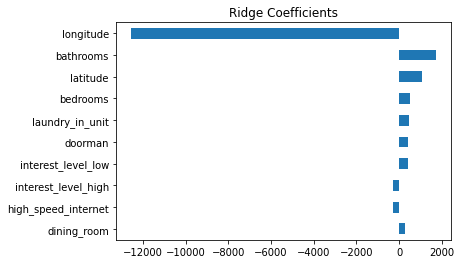

**Note:** Your figure shouldn't be identical to the one above. Your model will have different coefficients since it's been trained on different data. Only the formatting should be the same.

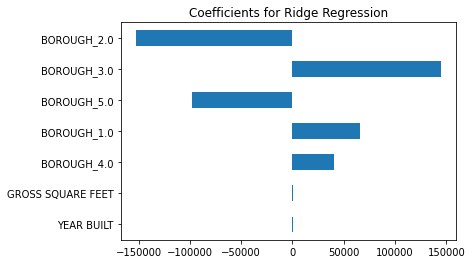

In [154]:
coefficients = model_r.coef_
features = ohe.get_feature_names()
feat_imp = pd.Series(coefficients, index=features).sort_values(key=abs)
feat_imp.plot(kind='barh')
plt.title('Coefficients for Ridge Regression');

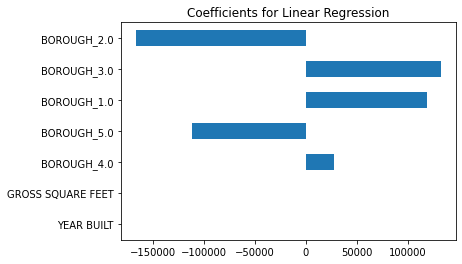

In [155]:
coefficients = model_lr.coef_
features = ohe.get_feature_names()
feat_imp = pd.Series(coefficients, index=features).sort_values(key=abs)
feat_imp.plot(kind='barh')
plt.title('Coefficients for Linear Regression');